# Framingham Heart Study Dataset 
## Version 1: Scaling attributes
link to kaggle: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset


The objective of this study is to compare different classification algorithms and methods of preprocessing to solidify Machine Learning concepts. 

The dataset is comprised by many different informations about the patients, as seen below: 

#### Demographics:
- Sex: male or female(Nominal)
- Age (Coninuous)
- Education

#### Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)(0 - No, 1 - Yes)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (Continuous)

#### Medical History: 

- BP Meds: whether or not the patient was on blood pressure medication (binary - 0 - No, 1 - Yes)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive  ( binary - 0 - No, 1 - Yes)
- Diabetes: whether or not the patient had diabetes (Nominal) ( binary - 0 - No, 1 - Yes)

#### Target variable:
- 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score

In [113]:
data = pd.read_csv('framingham_heart_disease.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Part 1: Exploratory data analysis

#### Cleaning wrong data, missing data and unecessary data

Deleting unecesary data - this analysis will be based solely on information about habits and health conditions. 
Some other considerations:

#### currentSmoker and cigsPerDay : 
I will choose cigsPerDay as a variable for the study as zero cigsPerDay means the patient is a non-smoker

In [115]:
#Deleting the information about education
data.drop(['education', 'male', 'currentSmoker'],axis=1,inplace=True)
data.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [116]:
data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Looking for null data or missing numbers

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4238 non-null   int64  
 1   currentSmoker    4238 non-null   int64  
 2   cigsPerDay       4209 non-null   float64
 3   BPMeds           4185 non-null   float64
 4   prevalentStroke  4238 non-null   int64  
 5   prevalentHyp     4238 non-null   int64  
 6   diabetes         4238 non-null   int64  
 7   totChol          4188 non-null   float64
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4219 non-null   float64
 11  heartRate        4237 non-null   float64
 12  glucose          3850 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 463.7 KB


In [118]:
data.shape

(4238, 14)

In [119]:
data.isna().sum()
null = data[data.isna().any(axis=1)]
null

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,39,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,43,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,60,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
42,52,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
49,36,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,51,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,51,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,56,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


Out of 4238 rows 489, ie, 11% of rows have missing values. This is a lot, but for this study we will consider that missing health data cannot be replaced by the mean or other method of EDA. To keep on using the data, all rows with missing values will be deleted: 

In [120]:
data = data.dropna()
data.isna().sum()

age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Part 2: Visualizing Statistics on the data 

In [121]:
data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


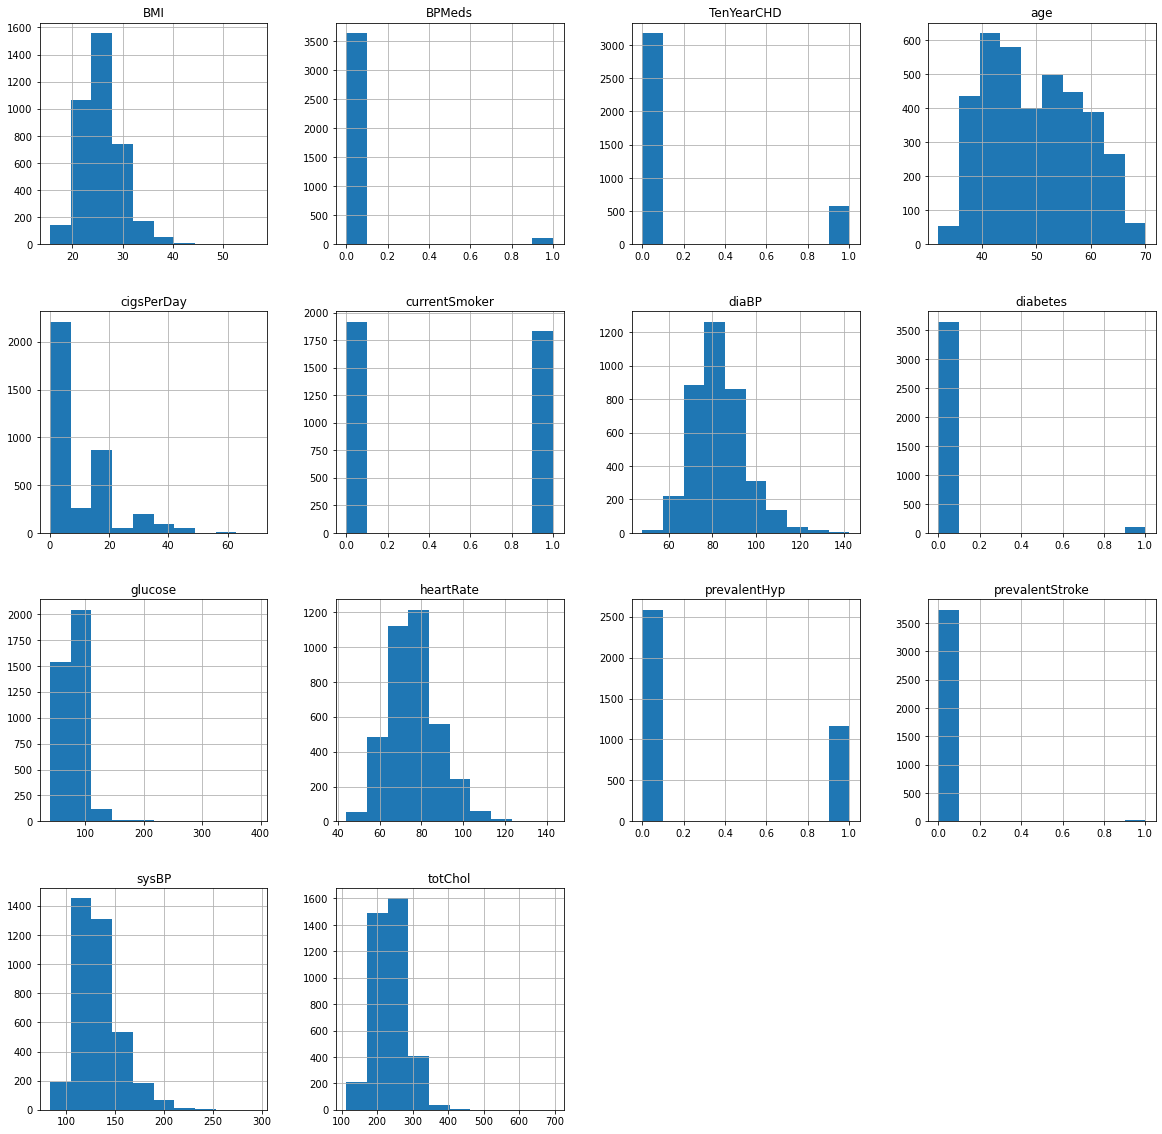

In [122]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax);

## Part 3: Preparing the model for Machine Learning



### Separating the data

In [123]:
data.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [124]:
predictors = data.iloc[:, 0:13].values
classificator = data.iloc[:, 13].values

### Scaling the attributes

In [125]:
scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)

## Part 4: Naive Bayes Algorithm

In [155]:
predictors_train, predictors_test, classificator_train, classificator_test = train_test_split(predictors, classificator, test_size=0.15, random_state=0)

The test size is 25% and training size is 75% of the data . 

In [156]:
from sklearn.naive_bayes import GaussianNB

In [157]:
classifier = GaussianNB()

In [158]:
#Training the model
classifier.fit(predictors_train, classificator_train)

GaussianNB()

The code above actually generates the probability table

In [159]:
predictions = classifier.predict(predictors_test)

In [160]:
precision_bayes = accuracy_score(classificator_test, predictions)
precision_bayes

0.827708703374778

In [73]:
mat_bayes = confusion_matrix(classificator_test, predictions)
mat_bayes

array([[731,  65],
       [113,  29]], dtype=int64)

## Part 5: Decision Trees Algorithm

#### Preparation: 

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [76]:
classifier.fit(predictors_train, classificator_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [77]:
print(classifier.feature_importances_)

[0.11061383 0.00115273 0.05417308 0.00598862 0.00214865 0.0083816
 0.00668641 0.1152842  0.17107882 0.09729855 0.18801848 0.10341229
 0.13576275]


In [78]:
predictions = classifier.predict(predictors_test)

Testing the accuracy

In [80]:
precision_tree = accuracy_score(classificator_test, predictions)
precision_tree

0.7494669509594882

In [81]:
mat_tree = confusion_matrix(classificator_test, predictions)
mat_tree

array([[664, 132],
       [103,  39]], dtype=int64)

## Part 6: Random forest 

In [85]:
classifier = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)

In [86]:
classifier.fit(predictors_train, classificator_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [87]:
predictions = classifier.predict(predictors_test)

#### Testing the accuracy

In [89]:
precision_forest = accuracy_score(classificator_test, predictions)
precision_forest

0.8432835820895522

In [90]:
mat_forest = confusion_matrix(classificator_test, predictions)
mat_forest

array([[786,  10],
       [137,   5]], dtype=int64)

## Part 7: KNM 

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(predictors_train, classificator_train)
predictions = classifier.predict(predictors_test)

In [94]:
precision_knm= accuracy_score(classificator_test, predictions)
precision_knm

0.835820895522388

In [98]:
mat_knm = confusion_matrix(classificator_test, predictions)
mat_knm

array([[767,  29],
       [125,  17]], dtype=int64)

## Part 8: Logistic Regression 

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
classifier = LogisticRegression(random_state = 1, solver='lbfgs')
classifier.fit(predictors_train, classificator_train)
predictions = classifier.predict(predictors_test)

In [154]:
precision_lr = accuracy_score(classificator_test, predictions)
precision_lr

0.8507462686567164

In [ ]:
mat_lr = confusion_matrix(classification_test, predictions)
mat_lr

## Part 9: SVM - Support Vector Machines

In [99]:
from sklearn.svm import SVC

In [100]:
classifier = SVC(kernel = 'rbf', random_state = 1, C = 2.0, gamma='auto')
classifier.fit(predictors_train, classificator_train)
predictions = classifier.predict(predictors_test)

In [101]:
precision_svm = accuracy_score(classificator_test, predictions)
precision_svm

0.849680170575693

In [102]:
mat = confusion_matrix(classificator_test, predictions)
mat

array([[791,   5],
       [136,   6]], dtype=int64)

## Part 9: Neural Networks

In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
classifier = MLPClassifier(verbose = True,
                              max_iter=1000,
                              tol = 0.0000010,
                              solver = 'adam',
                              hidden_layer_sizes=(100),
                              activation='relu')

In [105]:
classifier.fit(predictors_train, classificator_train)
predictions = classifier.predict(predictors_test)

0.34151260
Iteration 156, loss = 0.34151271
Iteration 157, loss = 0.34152283
Iteration 158, loss = 0.34160322
Iteration 159, loss = 0.34300582
Iteration 160, loss = 0.34165457
Iteration 161, loss = 0.34093279
Iteration 162, loss = 0.34039874
Iteration 163, loss = 0.34086731
Iteration 164, loss = 0.34006507
Iteration 165, loss = 0.33994802
Iteration 166, loss = 0.34015485
Iteration 167, loss = 0.33977150
Iteration 168, loss = 0.34010941
Iteration 169, loss = 0.33940030
Iteration 170, loss = 0.33933362
Iteration 171, loss = 0.34060562
Iteration 172, loss = 0.33965121
Iteration 173, loss = 0.33879175
Iteration 174, loss = 0.33980121
Iteration 175, loss = 0.34287785
Iteration 176, loss = 0.34200772
Iteration 177, loss = 0.33866912
Iteration 178, loss = 0.33923549
Iteration 179, loss = 0.33930838
Iteration 180, loss = 0.33809847
Iteration 181, loss = 0.33709469
Iteration 182, loss = 0.33811699
Iteration 183, loss = 0.33842937
Iteration 184, loss = 0.33927745
Iteration 185, loss = 0.33797342

In [106]:
precision_nn = accuracy_score(classificator_test, predictions)
precision_nn

0.8454157782515992

In [108]:
mat_nn = confusion_matrix(classificator_test, predictions)
mat_nn

array([[772,  24],
       [121,  21]], dtype=int64)